# Decision trees

In [ ]:
# libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


## `load_breast_cancer`
Para esta notebook vamos a utilizar el dataset [brest_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) del módulo `datasetss` de `sklearn`

In [5]:
dataset = load_breast_cancer()
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
type(dataset.data), dataset.data.shape

(numpy.ndarray, (569, 30))

In [12]:
type(dataset.target), dataset.target.shape

(numpy.ndarray, (569,))

In [14]:
import numpy as np
np.unique(dataset.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

**0 = Malignant<br>
1 = Benign**

In [11]:
dataset.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## `train_test_split`

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target)

In [16]:
X_train.shape, y_train.shape

((426, 30), (426,))

In [17]:
X_test.shape, y_test.shape

((143, 30), (143,))

## `DecisionTreeClassifier()`

Vamos a empezar utilizando un modelo de árbol de decisión único.

In [38]:
# 1. Instanciamos el modelo, dejamos todos los hiperparámetros definidos por defecto
clf = DecisionTreeClassifier(random_state = 1)

# 2. Entrenamos el modelo utilizando los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [39]:
# evaluamos el resultado sobre el grupo de datos de entrenamiento.
# Algo que sabemos que no tiene mucho sentido. En el siguiente bloque haremos los mismo sobre los datos de prueba
predictions = clf.predict(X_train)
print(classification_report(y_true = y_train,
                            y_pred = predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       272

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



In [40]:
# Ahora evaluamos el resultado del modelo sobre los datos de test (o de prueba)
predictions = clf.predict(X_test)

print(classification_report(y_true = y_test,
                            y_pred = predictions))


              precision    recall  f1-score   support

           0       0.90      0.93      0.92        58
           1       0.95      0.93      0.94        85

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [41]:
type(dataset.feature_names)

numpy.ndarray

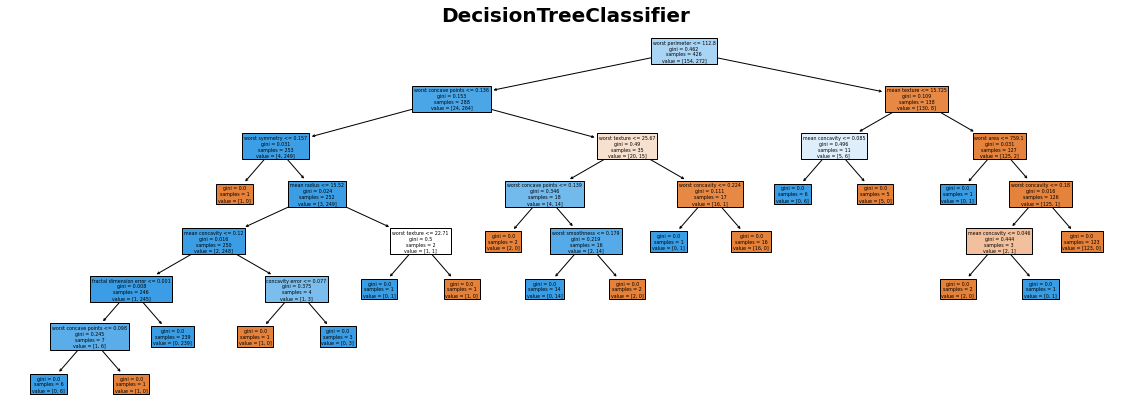

In [42]:
# graficamos el árbol (único árbol que representa este modelo)
plt.figure(figsize = (20,7))
plot_tree(decision_tree = clf,
          filled = True,
          feature_names = dataset.feature_names
          
         )

plt.title('DecisionTreeClassifier', fontsize = 20, fontweight = 'bold')
plt.show()

## `RandomForestClassifier`

Uno de los principales problemas de los árboles de decisión es el sobreajuste a los datos de entrenamiento. Suelen tener sesgo chico pero su varianza suele ser muy grande. La manera de sobrepasar este problema es utilizar el método de Random Forest. 


Random Forest en cierto sentido promedia múltiples árboles de decisión, entrenados con distintas partes del conjunto de datos de entrenamiento, con el objetivo de reducir la varianza.

El problema de este método es que se pierde la interpretabilidad tan clara que tiene un árbol de decisión acerca de cómo el algoritmo toma la decisión de clasificación o regresión. Sin embargo, suele exponenciar la performance del modelo final.

El método utiliza el concepto de "Bagging", que se traduce literal a "embolsar", pero que refiere a tomar puequeñas muestras con remplazo del conjunto de datos original. Podemos pensar al conjunto de datos original de entrenamiento como una bolsa con elementos adentro, y lo que hacemos es tomar  bolsitas de menor tamaño para realizar distintos árboles de decisión. Esto se hace secuencialmente, es decir: tomamos una bolsita, entrenamos un árbol de decisión con estos datos, luego reponemos la bolsita en la bolsa original y volvemos a tomar otra bolsita para generar otro árbol de decisión. Esto se repite $B$ veces y luego lo que se hace es promediar las probabilidades predichas por cada árbol en los $B$ árboles obtenidos (en el caso de regresión) o de fijarse cuál es la clase o nivel más votado (en el caso de clasificación).

Random forest se diferencia del método de Bagging al incorporar además la selección de un subconjunto de las variables en cada iteración. Esto evita la correlación entre los distintos árboles de decisión. Además, permite hacer una selección de variables relevantes ya que se puede obtener una importancia relativa de cada variable en la predicción. Esta mezcla de distintos modelos estadísticos y métodos de aprendizaje automático para obtener mejor performance predictiva caracteriza a los métodos llamados de ensamble o *ensemble methods*. Estamos mezclando varios modelos con tal de aumentar la capacidad predictiva del modelo global.

Como pueden ir dándose una idea, estos métodos recién pudieron ser útiles con el avance de la tecnología de las computadoras actuales. Las primeras ideas referidas a random forests fueron propuestas en 1995 y la extensión del algoritmo que se utiliza al día de hoy se patentó en 2006.

In [78]:
# 1. Instanciamos el modelo Random Forest
clf = RandomForestClassifier(n_estimators = 100,  # seteamos 100 arboles independientes
                             random_state = 2,
                             bootstrap = True  # If False, the whole dataset is used to build each tree
                            )


# 2. Entrenamos el modelo
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [79]:
# analizamos las métricas del modelo sobre el conjunto de datos de test.
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.97      0.99      0.98        85

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



**Conclusión:** Vemos que el modelo de Random Forest basado en la metodología de ensamble tiene una performance mejor que el modelo basado solo en UN árbol de decisión.

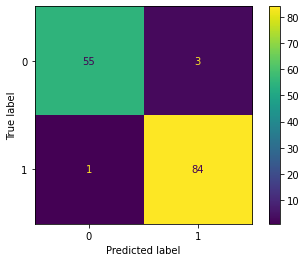

In [84]:
# graficamos la matriz e confusión

cm = confusion_matrix(y_true = y_test,
                      y_pred = predictions,
                      labels=clf.classes_,
                     )

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()
plt.show()

Podemos analizar cuánto aporta cda atributo a la toma de decisiones

In [86]:
clf.feature_importances_

array([0.04242905, 0.01792844, 0.05385354, 0.06888997, 0.00405321,
       0.01692918, 0.03502604, 0.07219739, 0.00294055, 0.00392956,
       0.01070735, 0.00420235, 0.01869019, 0.04124691, 0.00392161,
       0.00418356, 0.01272024, 0.00229058, 0.00448004, 0.00342372,
       0.17367447, 0.01913877, 0.08385751, 0.1165308 , 0.01464065,
       0.01664344, 0.03306258, 0.10094468, 0.00722231, 0.01024133])

In [89]:
feature_imp = pd.Series(clf.feature_importances_,index=dataset.feature_names).sort_values(ascending=False)
feature_imp[:10]

worst radius            0.173674
worst area              0.116531
worst concave points    0.100945
worst perimeter         0.083858
mean concave points     0.072197
mean area               0.068890
mean perimeter          0.053854
mean radius             0.042429
area error              0.041247
mean concavity          0.035026
dtype: float64

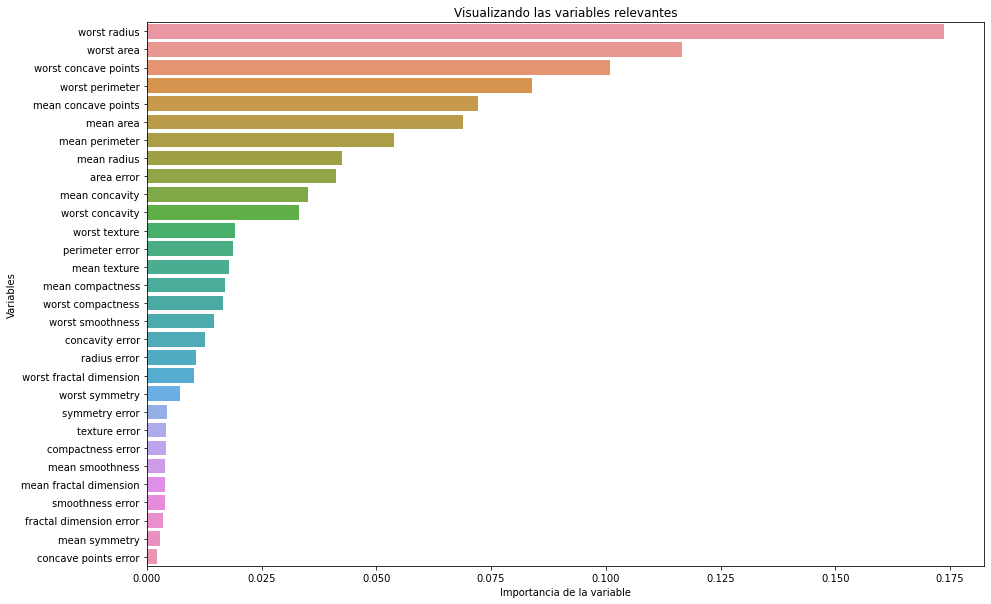

In [90]:
plt.figure(figsize=(15,10))
# creamos el gráfico de barras
sns.barplot(x=feature_imp, y=feature_imp.index)

# agregamos estilo
plt.xlabel('Importancia de la variable')
plt.ylabel('Variables')
plt.title("Visualizando las variables relevantes")

#mostramos y cerramos gráfico
plt.show()

Ejemplo interesante de uso de Random Forests: https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/data